In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from datetime import datetime
from dateutil.parser import parse
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import dash
import dash_core_components as dcc 
import dash_html_components as html
from dash.dependencies import Input, Output
import warnings
warnings.filterwarnings('ignore')

In [2]:
city_d = pd.read_csv('city_day.csv')
cities_info = pd.read_csv('city.csv')

In [3]:
city_d.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [4]:
# Find the Missing values for all the pollutants
def table1_missing_values(df):

        missing_value = df.isnull().sum()
        
        missing_value_percent = 100 * df.isnull().sum() / len(df)
        
        missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
        
        missing_value_table_ren_columns = missing_value_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        missing_value_table_ren_columns = missing_value_table_ren_columns[
            missing_value_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending= True).round(1)
        
        return missing_value_table_ren_columns

missing_values= table1_missing_values(city_d)
missing_values.style.background_gradient(cmap='Blues')

In [5]:
# Convert string to datetime64
city_d['Date'] = pd.to_datetime(city_d['Date'])
#city_d.set_index('Date',inplace=True)

In [6]:
city_d.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)

In [7]:
city_d['Particulate_Matter'] = city_d['PM2.5']+city_d['PM10']
#Combing PM2.5 AND PM10 as Particulate matter

In [8]:
city_d['Nitrogen_family'] = city_d['NOx']+city_d['NO']+city_d['NO2']
city_d.drop(['NOx','NO','NO2'],axis=1);
#Combining NOx, NO, and NO2 in a single group called Nitrigen family

In [9]:
city_d['BTX'] = city_d['Benzene']+city_d['Toluene']+city_d['Xylene']
city_d.drop(['Benzene','Toluene','Xylene'],axis=1); 
#Combining Benzene, Toulene, and Xylene in a single group called BTX

In [10]:
air_pollutant = ['Particulate_Matter','Nitrogen_family', 'CO', 'SO2','O3', 'BTX']
#Looking at the most harmful ones for the cause of pollution  

In [11]:
fig_pie = px.pie(data_frame= city_d, names = 'City', values = 'AQI')
fig_pie.show()

In [12]:
fig_hist= px.histogram(data_frame= city_d, x = 'City', y = 'Nitrogen_family')
fig_hist.show()

In [13]:
fig_hist= px.histogram(data_frame= city_d, x = 'City', y = 'BTX')
fig_hist.show()

In [14]:
city_d.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
dff = city_d.copy()
dff['PM2.5']=dff['PM2.5'].fillna((dff['PM2.5'].median()))
dff['Xylene']=dff['Xylene'].fillna((dff['Xylene'].median()))
dff['AQI']=dff['AQI'].fillna((dff['AQI'].median()))
dff['NO']=dff['NO'].fillna((dff['NO'].median()))
dff['NO2']=dff['NO2'].fillna((dff['NO2'].median()))
dff['NOx']=dff['NOx'].fillna((dff['NOx'].median()))
dff['PM10']=dff['PM10'].fillna((dff['PM10'].median()))
dff['SO2']=dff['SO2'].fillna((dff['SO2'].median()))
dff['O3']=dff['O3'].fillna((dff['O3'].median()))
dff['Benzene']=dff['Benzene'].fillna((dff['Benzene'].median()))
dff['Toluene']=dff['Toluene'].fillna((dff['Toluene'].median()))
dff['NH3']=dff['NH3'].fillna((dff['NH3'].median()))
dff['CO']=dff['CO'].fillna((dff['CO'].median()))




In [15]:
df = dff.copy()
df = df[df['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23424 entries, 0 to 26097
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          23424 non-null  object        
 1   Date                          23424 non-null  datetime64[ns]
 2   AQI                           23424 non-null  float64       
 3   Air_quality                   19268 non-null  object        
 4   Particulate_Matter            12183 non-null  float64       
 5   Nitrogen_family               18553 non-null  float64       
 6   BTX                           8314 non-null   float64       
 7   Vehicular Pollution content   23424 non-null  float64       
 8   Industrial Pollution content  23424 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ MB


In [16]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities wise data',yTitle=var, 
                                     linecolor='red', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [17]:
def Year_month_plot(dataframe,value):
    
    df['Year'] = [d.year for d in df.Date]
    df['Month'] = [d.strftime('%b') for d in df.Date]
    years = df['Year'].unique()

    fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi= 80)
    sns.boxplot(x='Year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=df.loc[~df.Year.isin([2015, 2020]), :])

    axes[0].set_title('Year-wise \n', fontsize=20); 
    axes[1].set_title('Month-wise Plot \n', fontsize=20)
    plt.show()

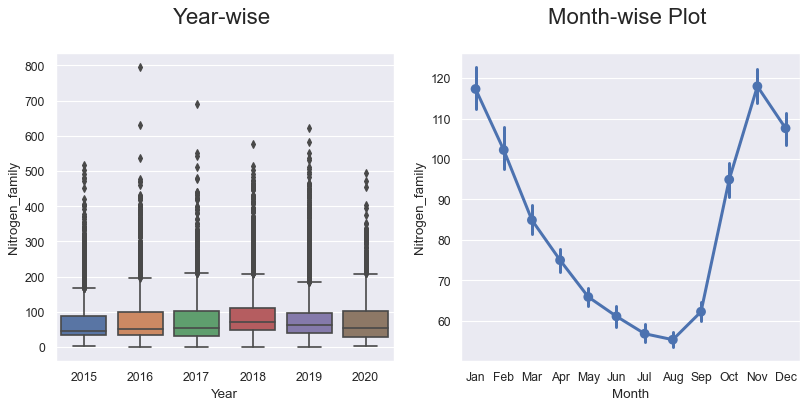

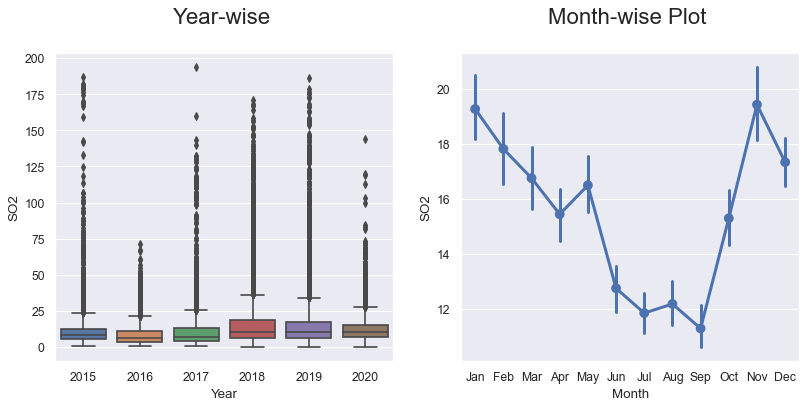

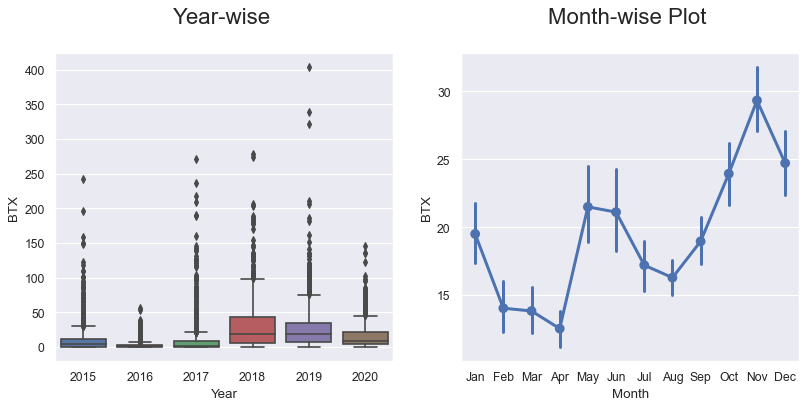

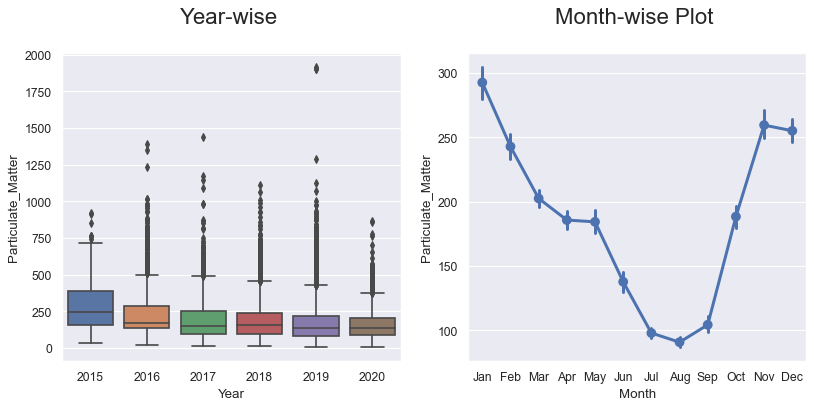

In [18]:
df = city_d.copy()
value='Nitrogen_family'
Year_month_plot(df,value)
df = city_d.copy()
value='SO2'
Year_month_plot(df,value)
df = city_d.copy()
value='BTX'
Year_month_plot(df,value)
df = city_d.copy()
value='Particulate_Matter'
Year_month_plot(df,value)
#Comparing BTX, Nitrogen family, Particulate Matter,and SO2

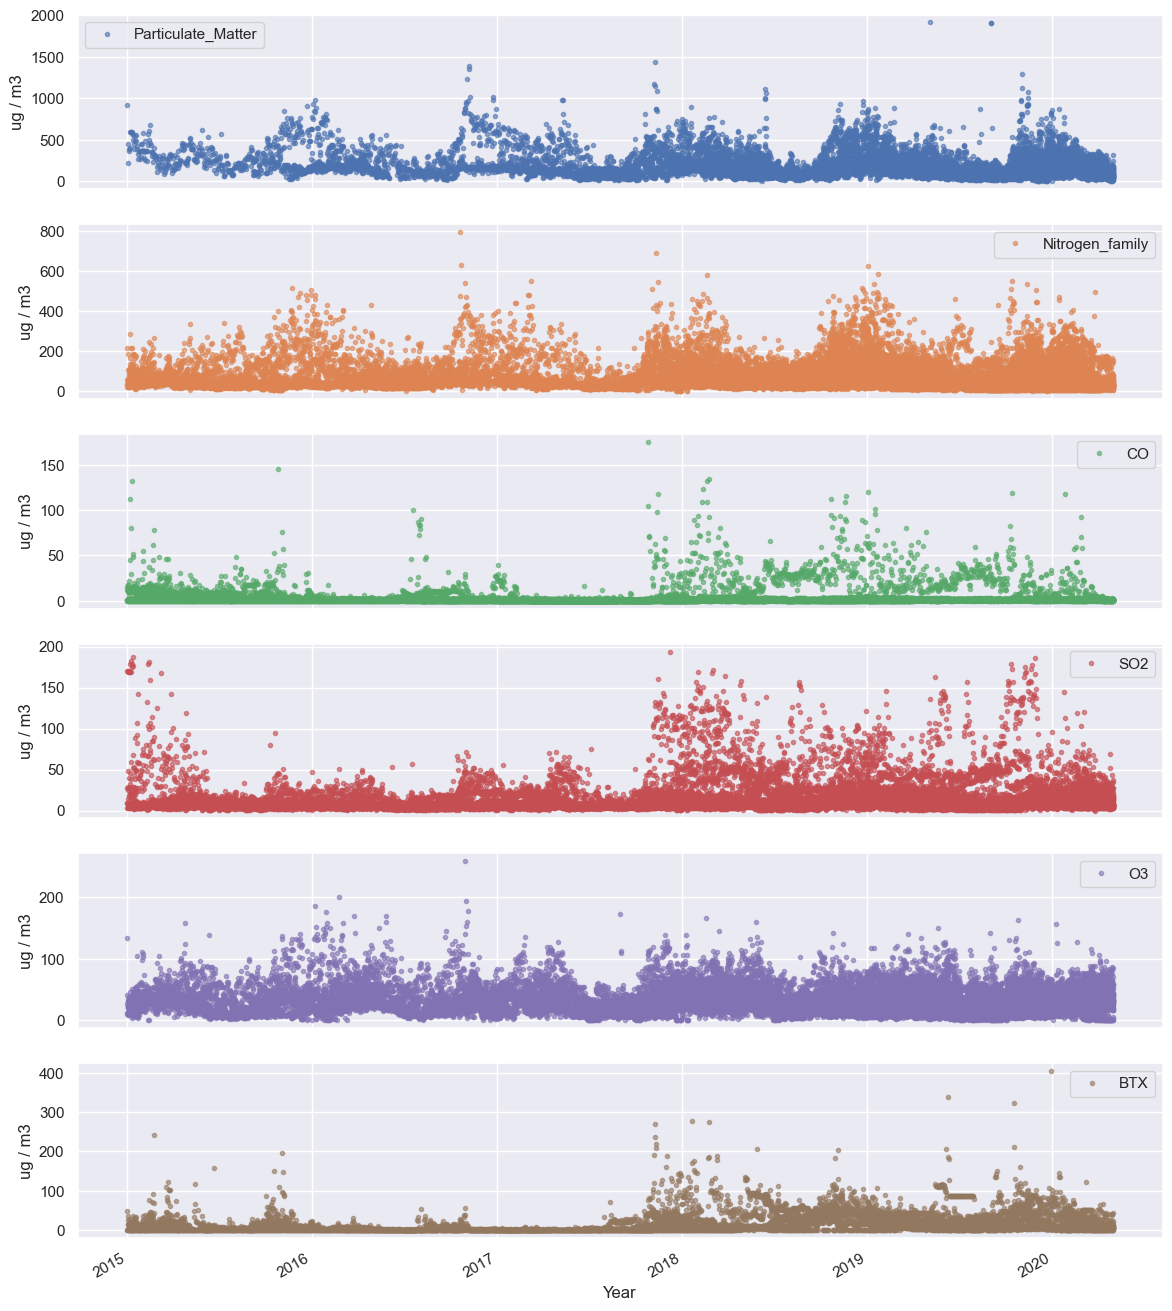

In [19]:
city_d.set_index('Date',inplace=True)
axes = city_d[air_pollutant].plot(marker='.', alpha=0.6, linestyle='None', figsize=(14, 18), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Year')
    ax.set_ylabel('ug / m3')

In [20]:
#interactive graphing with dash
app = dash.Dash(__name__)

In [21]:
app.layout=html.Div([
    html.H1("Pollution Comparison"),
    dcc.Dropdown(id='city-name',
                 options=[{'label':x, 'City':x}
                          for x in sorted(df.City.unique())],
                 value='City'
                 ),
    dcc.Graph(id='my-graph',figure= px.histogram(data_frame= df, x = 'Date', y = 'AQI')
             )
              ]
)


In [48]:
@app.callback(
    Output(component_id = 'my-graph',component_property ='figure' ),
    [Input(component_id = 'city-name', component_property ='value')]
)
def interactive_graphs(value_city):
    print (value_city)
    return fig

app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
